## Bank Telemarketing Campaign Case Study.

#### Importing the libraries.

In [7]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [8]:
#import the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

## Session- 2, Data Cleaning 

### Segment- 2, Data Types 

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame. 

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type** 
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set. 

In [4]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0= pd.read_csv('bank_marketing_updated_v1.csv', skiprows=2)

In [5]:
#Print the head of the data frame.
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns; and Impute/Remove missing values

#### Cleaning up the missing values


In [16]:
#checking for missing values
inp0.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [35]:
#fid total values
inp0.shape
#(45211, 19)
#Find the percent of missing age values to overall values
float(100.0*20/45211)
#percent is only 0.044, which is insignificant

0.04423702196368141

In [23]:
#dropping the isnull() values from age
inp1=inp0[~inp0.age.isnull()].copy()
inp1.age.isnull().sum()

0

#### Dropping customer id column. 

In [6]:
#drop the customer id as it is of no use.
inp0.drop("customerid", axis=1, inplace=True)
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories. 

In [11]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0["job"]=inp0.jobedu.apply(lambda x: x.split(",")[0])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [12]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0["education"]=inp0.jobedu.apply(lambda x: x.split(",")[1])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [13]:
#drop the "jobedu" column from the dataframe.
inp0.drop("jobedu", axis=1, inplace=True)
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [24]:
#Month column has nulls. Unless dealt with, month cannot be split from year. Normalize month
inp1.month.value_counts(normalize=True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [25]:
#find mode value for month column
month_mode=inp1.month.mode()[0]
month_mode

'may, 2017'

In [27]:
#use mode, which is May 2017 to fill the null values
inp1.month.fillna(month_mode, inplace=True)
inp1.month.value_counts(normalize=True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [28]:
#now null value should be zero
inp1.month.isnull().sum()

0

In [31]:
#extract month from column 'month'
inp1.month=inp1.month.apply(lambda x: x.split(",")[0])
inp1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,may,261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,may,151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,may,76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,may,92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,may,198 sec,1,-1,0,unknown,no,unknown,unknown


In [32]:
#fixing pdays column as it has -1 values
  - This affects the calculation
  - simply make it missing -replace -1 with NaN
  - all summary statistics - mean, median, mode, etc. will ignore missing values 
inp1.pdays.describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [33]:
inp1.loc[inp1.pdays<0, "pdays"]=np.NaN
inp1.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Segment- 4, Handling Outliers 

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable 

In [36]:
#describe the age variable in inp1.
inp1.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

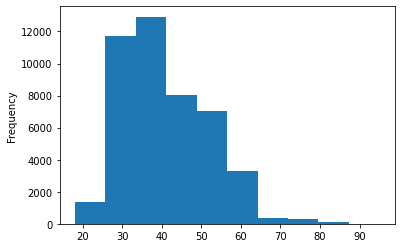

In [37]:
#plot the histogram of age variable.
inp1.age.plot.hist()
plt.show()

<function matplotlib.pyplot.show>

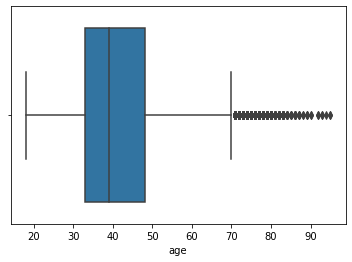

In [38]:
#plot the boxplot of age variable.
sns.boxplot(inp1.age)
plt.show
#though there are vairables outside, these are part of it and cnnot be considered as outliers

#### Salary variable 

In [39]:
#describe the salary variable of inp1.
inp1.salary.describe()

count     45191.000000
mean      57005.974641
std       32084.253154
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

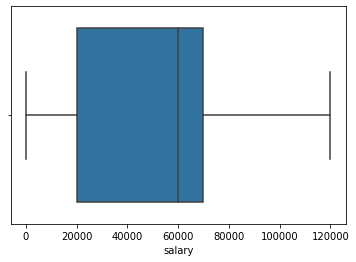

In [44]:
#plot the boxplot of salary variable.
sns.boxplot(inp1.salary)
plt.show()

#### Balance variable 

In [43]:
#describe the balance variable of inp1.
inp1.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

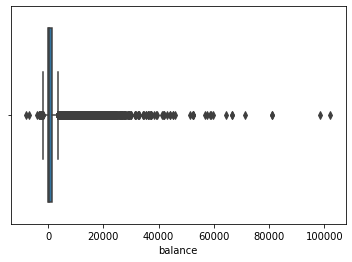

In [41]:
#plot the boxplot of balance variable.
sns.boxplot(inp1.balance)
plt.show()

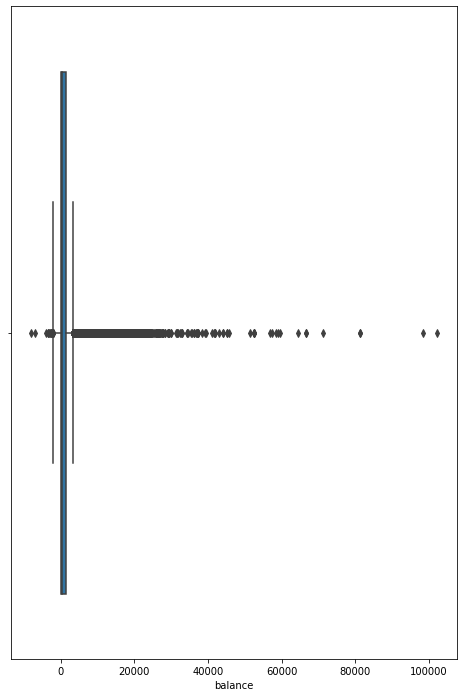

In [40]:
#plot the boxplot of balance variable after scaling in 8:2.
plt.figure(figsize=[8,12])
sns.boxplot(inp1.balance)
plt.show()
#since the values are continuous these are not outliers. 

In [45]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp1.balance.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: balance, dtype: float64

In [46]:
inp1[inp1.balance>15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


PROTIP: Instead of looking at mean, we could look at quantile/ medians/ percentiles

### Segment- 6, Standardising values 

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [47]:
#describe the duration variable of inp1
inp1.duration.describe()
inp1.duration.head(10)

count       45191
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [54]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
inp1.duration.apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))

AttributeError: ignored

In [55]:
#describe the duration variable
inp1.duration.describe()

count    45191.000000
mean         4.303030
std          4.292739
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

## Session- 3, Univariate Analysis 

### Segment- 2, Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status 

In [ ]:
#calculate the percentage of each marital status category. 


In [ ]:
#plot the bar graph of percentage marital status categories


#### Job  

In [ ]:
#calculate the percentage of each job status category.


In [ ]:
#plot the bar graph of percentage job categories


### Segment- 3, Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

In [ ]:
#calculate the percentage of each education category.


In [ ]:
#plot the pie chart of education categories


#### poutcome 

In [ ]:
#calculate the percentage of each poutcome category.


#### Response the target variable 

In [ ]:
#calculate the percentage of each response category.


In [ ]:
#plot the pie chart of response categories


## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis 

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

In [ ]:
#plot the scatter plot of balance and salary variable in inp1


In [ ]:
#plot the scatter plot of balance and age variable in inp1


In [ ]:
#plot the pair plot of salary, balance and age in inp1 dataframe.


#### Correlation heat map 

In [ ]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.


### Segment- 4, Numerical categorical variable

#### Salary vs response 

In [ ]:
#groupby the response to find the mean of the salary with response no & yes seperatly.


In [ ]:
#groupby the response to find the median of the salary with response no & yes seperatly.


In [ ]:
#plot the box plot of salary for yes & no responses.


#### Balance vs response 

In [ ]:
#plot the box plot of balance for yes & no responses.


In [ ]:
#groupby the response to find the mean of the balance with response no & yes seperatly.


In [ ]:
#groupby the response to find the median of the balance with response no & yes seperatly.


##### 75th percentile 

In [ ]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [ ]:
#calculate the mean, median and 75th percentile of balance with response


In [ ]:
#plot the bar graph of balance's mean an median with response.


#### Education vs salary 

In [ ]:
#groupby the education to find the mean of the salary education category.


In [ ]:
#groupby the education to find the median of the salary for each education category.


#### Job vs salary

In [ ]:
#groupby the job to find the mean of the salary for each job category.


### Segment- 5, Categorical categorical variable 

In [ ]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0


#### Education vs response rate

In [ ]:
#calculate the mean of response_flag with different education categories.


#### Marital vs response rate 

In [ ]:
#calculate the mean of response_flag with different marital status categories.


In [ ]:
#plot the bar graph of marital status with average value of response_flag


#### Loans vs response rate 

In [ ]:
#plot the bar graph of personal loan status with average value of response_flag


#### Housing loans vs response rate 

In [ ]:
#plot the bar graph of housing loan status with average value of response_flag


#### Age vs response 

In [ ]:
#plot the boxplot of age with response_flag


##### making buckets from age columns 

In [ ]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.


In [ ]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.


In [ ]:
#plot the bar graph of job categories with response_flag mean value.


### Segment-6, Multivariate analysis 

#### Education vs marital vs response 

In [ ]:
#create heat map of education vs marital vs response_flag


#### Job vs marital vs response 

In [ ]:
#create the heat map of Job vs marital vs response_flag.


#### Education vs poutcome vs response

In [ ]:
#create the heat map of education vs poutcome vs response_flag.
